In [1]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML


In [2]:
sys.path.insert(1, "/workspaces/ou-af/problem1/iteratie1")

In [3]:
import src.system as system
import src.diagrambuilder as builder
import specs.components as componentspecs
import specs.connections as connectionspecs
import specs.assemblies as assemblyspecs
import specs.tests as testspecs

In [4]:
def visualizeStructure(diagram):
    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=60)

In [5]:
def showCPTs(diagram, system):
    for component in system.getComponents():
        vars = component.getVariables()
        for v in vars:
            gnb.flow.row(diagram.cpt(v.name()))   
#    for i in range(0, diagram.size()-1):
#        gnb.flow.row(diagram.cpt(i))

In [6]:
def createCptRow(nodelist):
    if (len(nodelist) > 9): print("can't display cpt tables for component with more then 8 nodes")
    match len(nodelist):
        case 1: gnb.flow.row(diagram.cpt(nodelist[0]))
        case 2: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]))
        case 3: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]), diagram.cpt(nodelist[2]))
        case 4: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]), diagram.cpt(nodelist[2]), diagram.cpt(nodelist[3]))
        case 5: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]), diagram.cpt(nodelist[2]), diagram.cpt(nodelist[3]), diagram.cpt(nodelist[4]))
        case 6: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]), diagram.cpt(nodelist[2]), diagram.cpt(nodelist[3]), diagram.cpt(nodelist[4]), diagram.cpt(nodelist[5]))
        case 7: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]), diagram.cpt(nodelist[2]), diagram.cpt(nodelist[3]), diagram.cpt(nodelist[4]), diagram.cpt(nodelist[5]), diagram.cpt(nodelist[6]))
        case 8: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]), diagram.cpt(nodelist[2]), diagram.cpt(nodelist[3]), diagram.cpt(nodelist[4]), diagram.cpt(nodelist[5]), diagram.cpt(nodelist[6]), diagram.cpt(nodelist[7]))
        case 9: gnb.flow.row(diagram.cpt(nodelist[0]), diagram.cpt(nodelist[1]), diagram.cpt(nodelist[2]), diagram.cpt(nodelist[3]), diagram.cpt(nodelist[4]), diagram.cpt(nodelist[5]), diagram.cpt(nodelist[6]), diagram.cpt(nodelist[7]), diagram.cpt(nodelist[8]))

In [7]:
def getDiagramChanceNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isChanceNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printCptTables(diagram, system):
    for component in system.getComponents():
        print("CPT tables for component: " + component.getName())
        createCptRow(getDiagramChanceNodeIdsForComponent(component.getName(), diagram))

In [8]:
def createUtilityRow(nodelist):
    if (len(nodelist) > 9): print("can't display utility tables for component with more then 8 nodes")
    match len(nodelist):
        case 1: gnb.flow.row(diagram.utility(nodelist[0]))
        case 2: gnb.flow.row(diagram.utility(nodelist[0]), diagram.utility(nodelist[1]))
        case 3: gnb.flow.row(diagram.utility(nodelist[0]), diagram.utility(nodelist[1]), diagram.utility(nodelist[2]))
        case 4: gnb.flow.row(diagram.utility(nodelist[0]), diagram.utility(nodelist[1]), diagram.utility(nodelist[2]), diagram.utility(nodelist[3]))
        case 5: gnb.flow.row(diagram.utility(nodelist[0]), diagram.utility(nodelist[1]), diagram.utility(nodelist[2]), diagram.utility(nodelist[3]), diagram.utility(nodelist[4]))
        case 6: gnb.flow.row(diagram.utilityutility(nodelist[0]), diagram.utility(nodelist[1]), diagram.utility(nodelist[2]), diagram.utility(nodelist[3]), diagram.utility(nodelist[4]), diagram.utility(nodelist[5]))
        case 7: gnb.flow.row(diagram.utility(nodelist[0]), diagram.utility(nodelist[1]), diagram.utility(nodelist[2]), diagram.utility(nodelist[3]), diagram.utility(nodelist[4]), diagram.utility(nodelist[5]), diagram.utility(nodelist[6]))
        case 8: gnb.flow.row(diagram.utility(nodelist[0]), diagram.utility(nodelist[1]), diagram.utility(nodelist[2]), diagram.utility(nodelist[3]), diagram.utility(nodelist[4]), diagram.utility(nodelist[5]), diagram.utility(nodelist[6]), diagram.utility(nodelist[7]))
        case 9: gnb.flow.row(diagram.utility(nodelist[0]), diagram.utility(nodelist[1]), diagram.utility(nodelist[2]), diagram.utility(nodelist[3]), diagram.utility(nodelist[4]), diagram.utility(nodelist[5]), diagram.utility(nodelist[6]), diagram.utility(nodelist[7]), diagram.utility(nodelist[8]))

In [9]:
def getDiagramUtilityNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isUtilityNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printUtilityTables(diagram, system):
    for component in system.getComponents():
        print("Utility tables for component: " + component.getName())
        createUtilityRow(getDiagramUtilityNodeIdsForComponent(component.getName(), diagram))

## main

In [10]:
# gather specs for a system
components = [componentspecs.light, componentspecs.switch]
connections = [connectionspecs.wire, connectionspecs.wire2]
tests = [testspecs.testObserveHealth]
assembly = {
    "components"  : components,
    "connections" : connections,
    "structure"   : assemblyspecs.structure1,
    "tests"       : tests,
    "testmapping" : testspecs.testmapping1
}

In [11]:
# read specifications, create system of objects
system = system.createSystemFromSpecs(assembly)

building system: structure1
number of components: 2
number of connections: 2
number of tests: 1


In [12]:
# create diagram object
diagram = gum.InfluenceDiagram()

In [13]:
diagram = builder.diagramBuilder(diagram, system)

adding component: Light
adding component: Switch
adding connection between: PresentPowerOutputsSwitch and: PresentPowerInputsLight
adding cpt for component: Light
adding cpt for component: Switch
adding cpt for connection: Wire
adding Replace decision for component: Light
adding Replace decision for component: Switch
adding Replace utility for component: Light
adding Replace utility for component: Switch
adding test: TestObserveHealth to component: Light


Influence Diagram{
  chance: 9,
  utility: 3,
  decision: 3,
  arcs: 15,
  domainSize: 6144
}


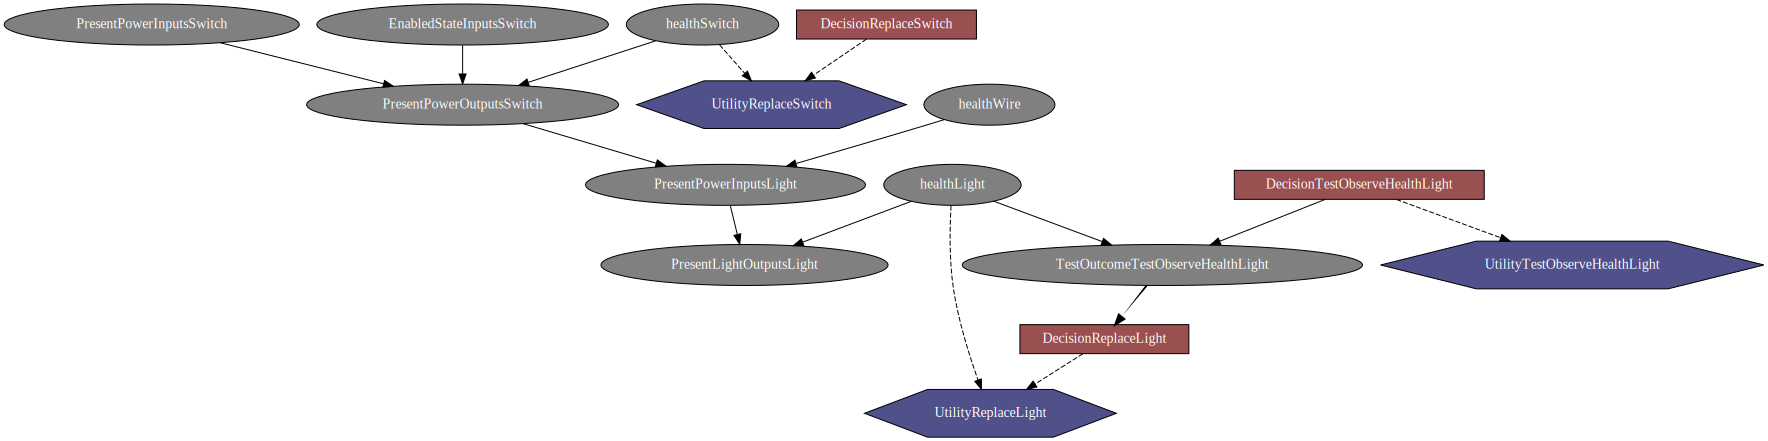

CPT tables for component: Light


CPT tables for component: Switch


Utility tables for component: Light


Utility tables for component: Switch


In [14]:
# reporting
visualizeStructure(diagram)
printCptTables(diagram, system)
printUtilityTables(diagram, system)

wat willen we allemaal weten?
de waarden van de besluiten

In [15]:
def makeInferenceDiag(diagram, evs):
    ie = gum.ShaferShenoyLIMIDInference(diagram) 
    ie.setEvidence(evs)
    ie.makeInference()
    return ie

In [16]:
def getDecisions(diagram):
    decisionlist = []
    for node in diagram.nodes():
        if diagram.isDecisionNode(node):
            decisionlist.append(diagram.variable(node).name())
    return decisionlist

def getNodeSets(diagram):
    utilitylist = []
    decisionlist = []
    chancelist = []
    for node in diagram.nodes():
        if diagram.isDecisionNode(node):
            decisionlist.append(diagram.variable(node).name())
        elif diagram.isUtilityNode(node):
            utilitylist.append(diagram.variable(node).name())
        elif diagram.isChanceNode(node):
            chancelist.append(diagram.variable(node).name())
    return (chancelist, decisionlist, utilitylist)


In [36]:
ie = makeInferenceDiag(diagram, {"healthSwitch":0,"DecisionReplaceSwitch": 0, "DecisionTestObserveHealthLight":1, "DecisionReplaceLight":0})
nodesets = getNodeSets(diagram)

decisionlist = nodesets[1]

for decision in decisionlist:
    print(decision)
    print(ie.posterior(decision))
    print(ie.optimalDecision(decision))
    print(ie.posteriorUtility(decision))
    break
for utility in nodesets[2]:
    print(utility)
    print(ie.posteriorUtility(utility))
    break
for chance in nodesets[0]:
    print(chance)
    print(ie.posterior(chance))
    break

DecisionReplaceLight

  DecisionReplaceLi|
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |


      ||  DecisionReplaceLi|
TestOu||yes      |no       |
------||---------|---------|
ok    || 1.0000  | 0.0000  |
broken|| 1.0000  | 0.0000  |
notdon|| 1.0000  | 0.0000  |


  DecisionReplaceLi|
yes      |no       |
---------|---------|
 -10.0000| 0.0000  |

UtilityReplaceLight

             ||  Utility|
Decisi|health||0        |
------|------||---------|
yes   |ok    || -5.0000 |
no    |ok    || 0.0000  |
yes   |broken|| -2.0000 |
no    |broken|| -4.0000 |

PresentLightOutputsLight

  PresentLightOutpu|
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |



In [37]:
# maximum expected utility
ie.MEU()

{'mean': -10.0, 'variance': 0.0}

In [38]:
gnb.flow.row(
    ie.posteriorUtility("UtilityReplaceSwitch"),
    ie.posterior("UtilityReplaceSwitch"),
    ie.posteriorUtility("DecisionReplaceSwitch"),
    ie.posterior("DecisionReplaceSwitch"),
    ie.optimalDecision("DecisionReplaceSwitch")
)

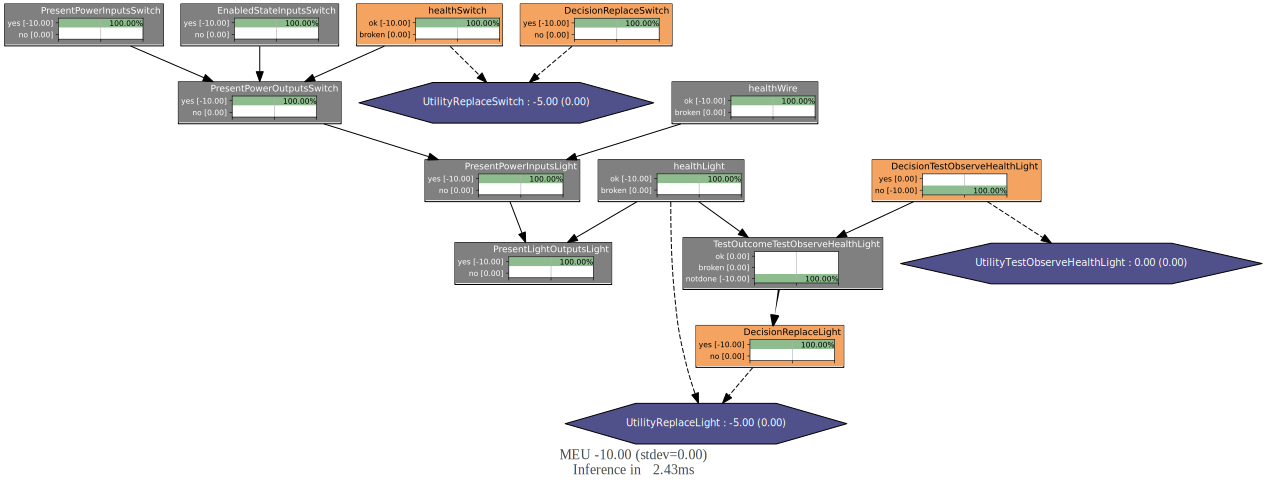

In [35]:
gnb.showInference(diagram, evs={"healthSwitch":0,"DecisionReplaceSwitch": 0, "DecisionTestObserveHealthLight":1, "DecisionReplaceLight":0}, size=40)